In [25]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [26]:
! kaggle datasets download -d yaswanthgali/sport-celebrity-image-classification

Dataset URL: https://www.kaggle.com/datasets/yaswanthgali/sport-celebrity-image-classification
License(s): CC0-1.0
 61% 9.00M/14.8M [00:00<00:00, 14.3MB/s]
100% 14.8M/14.8M [00:00<00:00, 22.8MB/s]


In [27]:
import zipfile
zip_ref = zipfile.ZipFile('/content/sport-celebrity-image-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [28]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [31]:
# Define the paths
train_data_dir = '/content/Sports-celebrity images'
valid_data_dir = '/content/Sports-celebrity images'

In [32]:
# Create instances of ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(
    rescale=1.0/255.0
)

# Generate batches of augmented image data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = valid_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 441 images belonging to 4 classes.
Found 441 images belonging to 4 classes.


In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

In [60]:
input_shape = (224, 224, 3)

In [61]:
model = Sequential()

In [62]:
#1st
model.add(Conv2D(32, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# 2nd
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# 3
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))

# 4
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))

# 5
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

In [63]:
# Flatten the layers
model.add(Flatten())

# 1st Fully Connected Layer
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# 2nd Fully Connected Layer
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(4, activation='softmax'))

In [64]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [65]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 54, 54, 32)        11648     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 26, 26, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        25632     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 32)       

In [66]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [67]:
print(train_generator.samples, train_generator.batch_size)

441 32


In [69]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=8
)

Epoch 1/8
13/13 [==============================] - 22s 2s/step - loss: 1.3543 - accuracy: 0.3570 - val_loss: 1.2832 - val_accuracy: 0.4231
Epoch 2/8
13/13 [==============================] - 19s 1s/step - loss: 1.3000 - accuracy: 0.4108 - val_loss: 1.2228 - val_accuracy: 0.4447
Epoch 3/8
13/13 [==============================] - 19s 1s/step - loss: 1.2539 - accuracy: 0.4352 - val_loss: 1.2245 - val_accuracy: 0.4038
Epoch 4/8
13/13 [==============================] - 19s 1s/step - loss: 1.2191 - accuracy: 0.4523 - val_loss: 1.1823 - val_accuracy: 0.5048
Epoch 5/8
13/13 [==============================] - 19s 1s/step - loss: 1.2717 - accuracy: 0.4181 - val_loss: 1.1664 - val_accuracy: 0.4928
Epoch 6/8
13/13 [==============================] - 21s 2s/step - loss: 1.2137 - accuracy: 0.4597 - val_loss: 1.1900 - val_accuracy: 0.4904
Epoch 7/8
13/13 [==============================] - 19s 1s/step - loss: 1.1035 - accuracy: 0.5355 - val_loss: 1.0556 - val_accuracy: 0.5337


In [70]:
# Evaluate the model on the validation data
validation_loss, validation_accuracy = model.evaluate(validation_generator)

print(f"Validation Loss: {validation_loss}")
print(f"Validation Accuracy: {validation_accuracy}")

14/14 [==============================] - 3s 177ms/step - loss: 1.0537 - accuracy: 0.5374
Validation Loss: 1.0537420511245728
Validation Accuracy: 0.5374149680137634


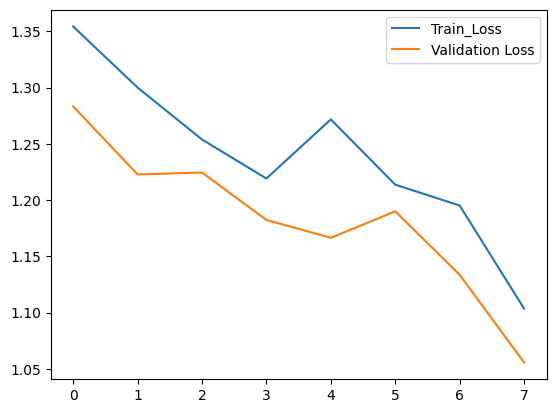

In [71]:
#Model loss
plt.plot(history.history['loss'],label='Train_Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()

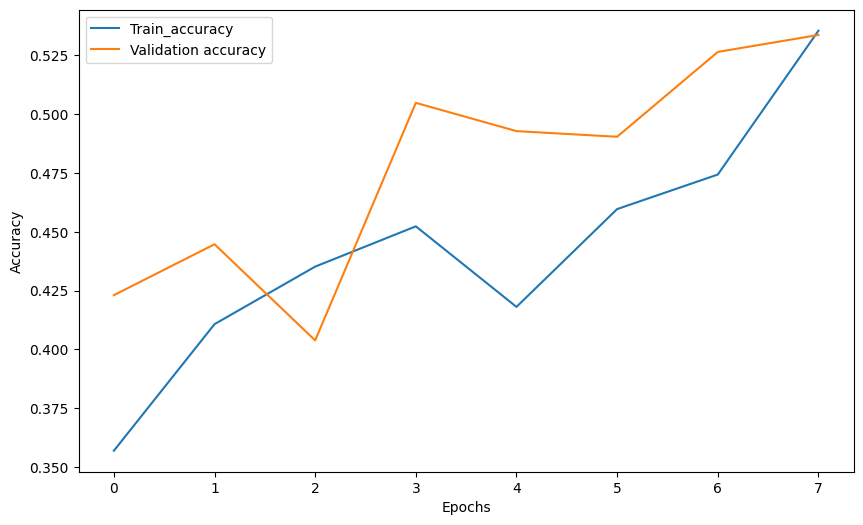

In [74]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train_accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()